In [4]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.core import *

# 보팅 분류기
from sklearn.ensemble import VotingClassifier

# 보팅에서 사용할 알고리즘 -> SVC, SGDClassifier는 확률을 제공하지 않으므로 소프트 보팅에는 적용 불가
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV

In [5]:
import sys
sys.path.append("Y:\Python\Mega_IT")

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/3.Ensemble/1.Voting")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\3.Ensemble\\1.Voting'

In [6]:
origin1 = pd.read_excel("./data/pima_indians_diabetes.xlsx")
origin1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 정제 대상 필드명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 0값을 결측치로 대체후 평균으로 다시 치환
df = origin1.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df2 = my_replace_missing_value(df)

# 결과확인
total_count = len(origin1)

for feature in zero_features:
    zero_count = origin1[origin1[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

print("---" * 30)

for feature in zero_features:
    zero_count = df2[df2[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %
------------------------------------------------------------------------------------------
Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


In [8]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, 'Outcome', scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [9]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [10]:
vo = VotingClassifier(
    # 결합할 알고리즘의 리스트 (이름, 알고리즘객체) - 이름은 개발자가 마음대로 지정
    estimators=[('LR', lr), ('KNN', knn), ('NB', nb), ('DT', dt)],
    # hard: 다수결, soft: 확률의 평균
    voting='soft')

# 학습
vo.fit(X=x_train, y=y_train)

# 예측(검증데이터로...)
y_pred = vo.predict(X=x_test)

# 검증 데이터에 대한 정확도
score = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Voting 분류기 정확도: {score:.4f}')
      
vo

Voting 분류기 정확도: 0.7468


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('NB', GaussianNB()),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.894137 |     0.746753 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.887179 |     0.651163 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.800926 |     0.538462 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0552764 |     0.147059 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.944724 |     0.852941 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.841849 |     0.589474 | 정밀도와 재현율의 조화평균                                |
| AUC               |      0.97648 |     0.775452 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

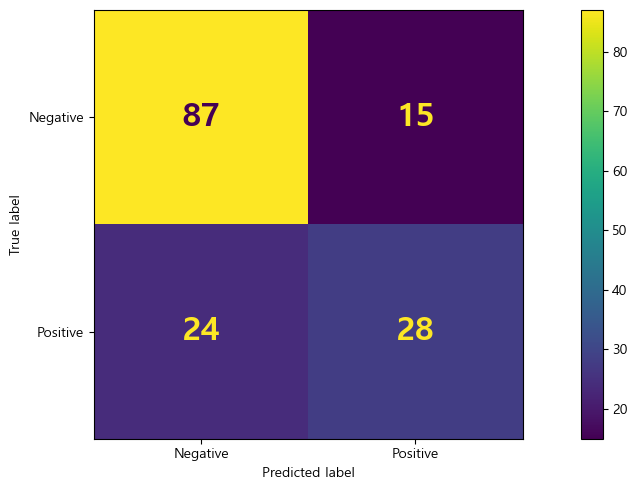

[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


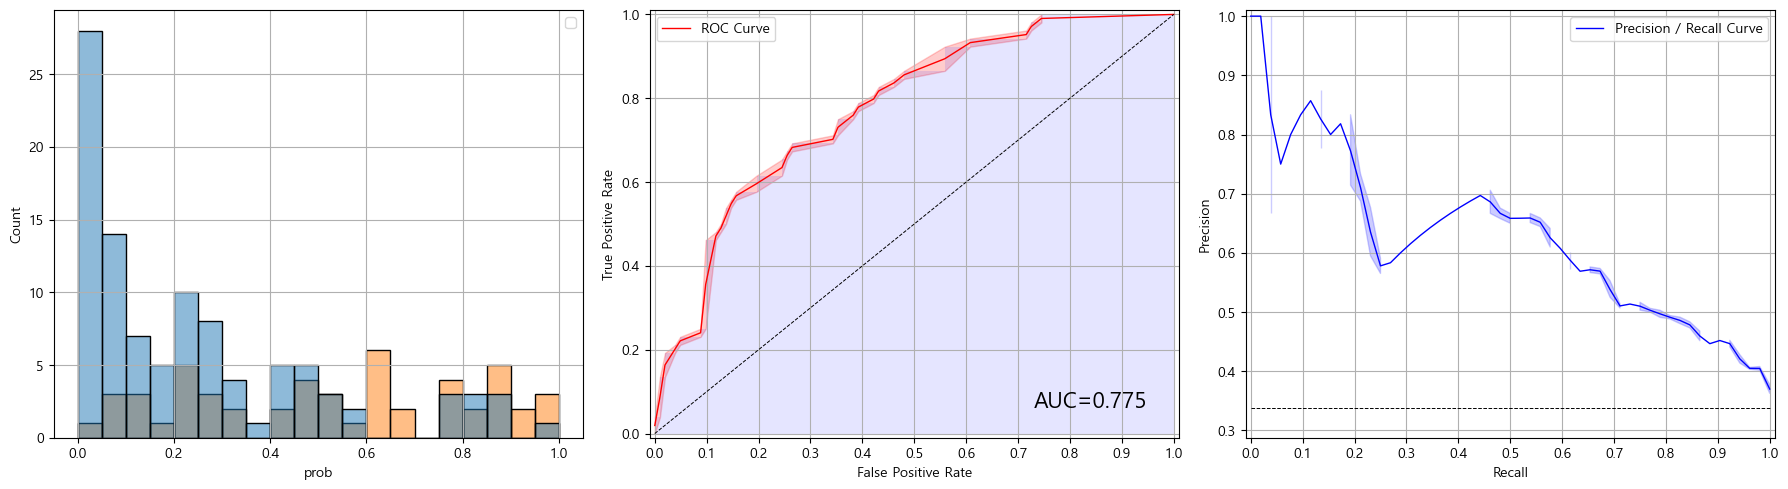


[학습곡선]


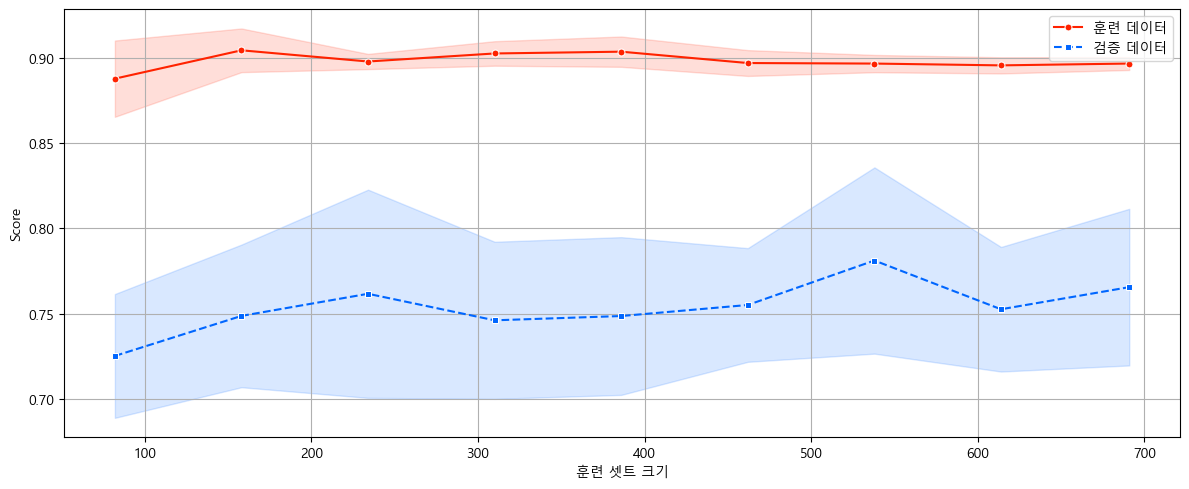

In [11]:
my_classification_result(estimator=vo, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

In [12]:
my_classification_report(estimator=vo, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

+----+------------+--------------------------+---------+
|    | 종속변수   | 독립변수                 |     VIF |
|----+------------+--------------------------+---------|
|  0 | Outcome    | Pregnancies              | 1.72987 |
|  1 | Outcome    | Glucose                  | 1.37433 |
|  2 | Outcome    | BloodPressure            | 1.39985 |
|  3 | Outcome    | SkinThickness            |  1.4874 |
|  4 | Outcome    | Insulin                  | 1.16212 |
|  5 | Outcome    | BMI                      | 1.76203 |
|  6 | Outcome    | DiabetesPedigreeFunction | 1.06232 |
|  7 | Outcome    | Age                      | 2.05027 |
+----+------------+--------------------------+---------+


In [13]:
estimators = [('LR', lr), ('KNN', knn), ('NB', nb), ('DT', dt)]
estimators

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('DT', DecisionTreeClassifier())]

In [14]:
lr_params = get_hyper_params(classname=LogisticRegression)
lr_params

{'penalty': ['l1', 'l2']}

In [15]:
knn_params = get_hyper_params(classname=KNeighborsClassifier)
knn_params

{'n_neighbors': array([2, 3, 4, 5]), 'metric': ['euclidean', 'manhattan']}

In [16]:
nb_params = get_hyper_params(classname=GaussianNB)
nb_params

{}

In [17]:
dt_params = get_hyper_params(classname=DecisionTreeClassifier)
dt_params

{'criterion': ['gini', 'entropy']}

In [18]:
default_params = [('LR', lr_params),
 ('KNN', knn_params),
 ('NB', nb_params),
 ('DT', dt_params)
]

default_params

[('LR', {'penalty': ['l1', 'l2']}),
 ('KNN',
  {'n_neighbors': array([2, 3, 4, 5]), 'metric': ['euclidean', 'manhattan']}),
 ('NB', {}),
 ('DT', {'criterion': ['gini', 'entropy']})]

In [19]:
params = {
    "voting": ['hard', 'soft']
}

In [20]:
for n, p in default_params:
    #print(n)
    #print(p)
    
    for k in p:
        #print(f'{n}__{k}')
        params[f'{n}__{k}'] = p[k]

params

{'voting': ['hard', 'soft'],
 'LR__penalty': ['l1', 'l2'],
 'KNN__n_neighbors': array([2, 3, 4, 5]),
 'KNN__metric': ['euclidean', 'manhattan'],
 'DT__criterion': ['gini', 'entropy']}

In [21]:
%%time

rcv = RandomizedSearchCV(
    estimator=VotingClassifier(estimators), param_distributions=params, 
    n_iter=10, 
    n_jobs=-1, 
    cv=5, 
    verbose=1)

rcv.fit(x_train, y_train)

result_df = pd.DataFrame(rcv.cv_results_['params'])
result_df['mean_test_score'] = rcv.cv_results_['mean_test_score']
result_df.sort_values(by='mean_test_score', ascending=False)

result_df

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: total: 46.9 ms
Wall time: 94.5 ms


,voting,LR__penalty,KNN__n_neighbors,KNN__metric,DT__criterion,mean_test_score
0,soft,l2,2,euclidean,entropy,0.762122
1,soft,l1,3,manhattan,entropy,NaN
2,soft,l1,5,euclidean,gini,NaN
3,soft,l2,5,euclidean,gini,0.753978
4,soft,l2,2,euclidean,gini,0.745875
5,soft,l2,4,manhattan,gini,0.747501
6,hard,l2,5,euclidean,gini,0.754005
7,hard,l1,2,manhattan,entropy,NaN
8,soft,l1,3,euclidean,gini,NaN
9,hard,l1,5,euclidean,gini,NaN


[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |      0.92671 |     0.746753 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.921182 |     0.632653 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.865741 |     0.596154 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |     0.040201 |     0.176471 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.959799 |     0.823529 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.892601 |     0.613861 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.987542 |     0.823718 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

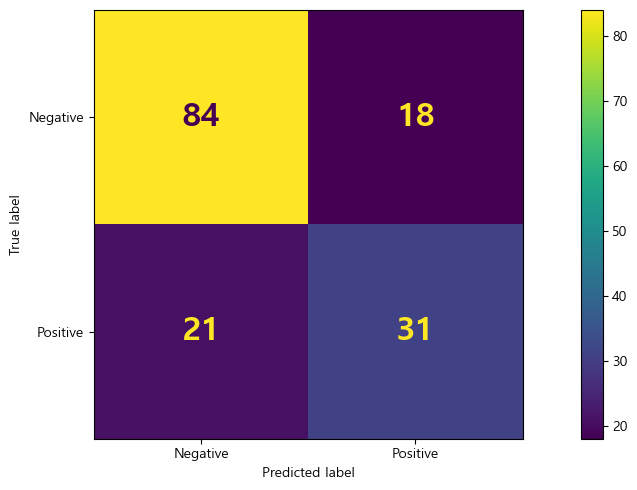


[Roc Curve]


[scatterd] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


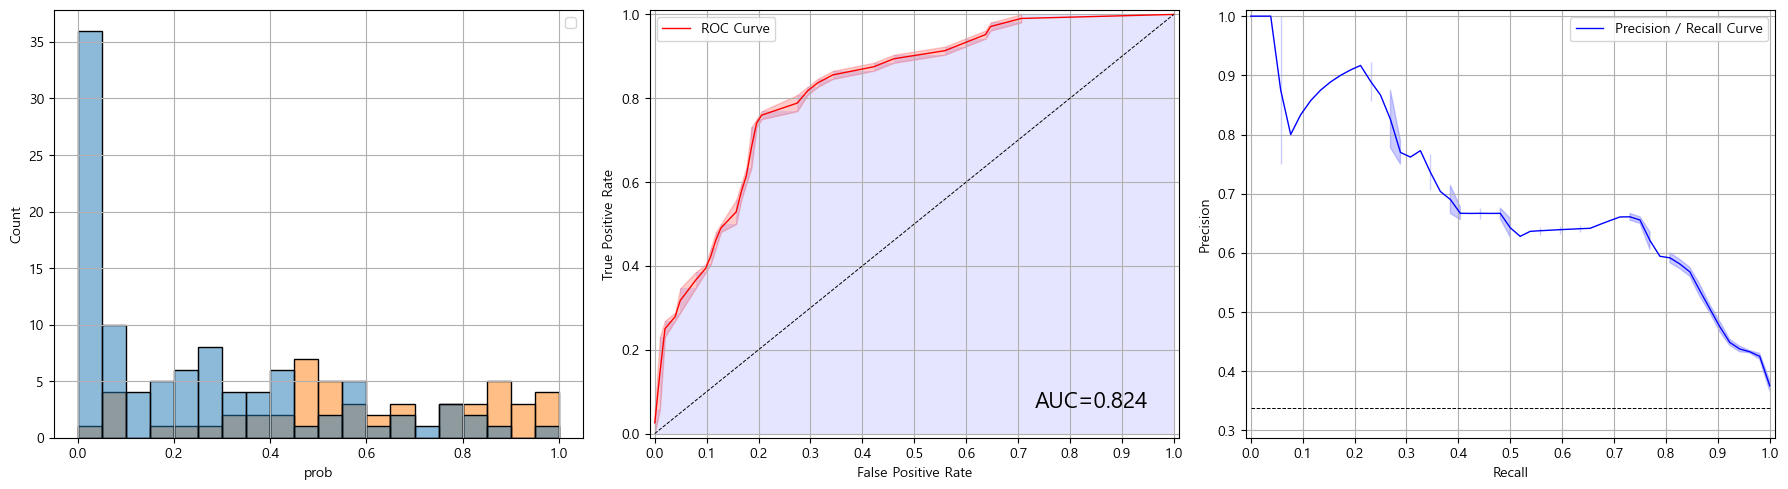


[학습곡선]


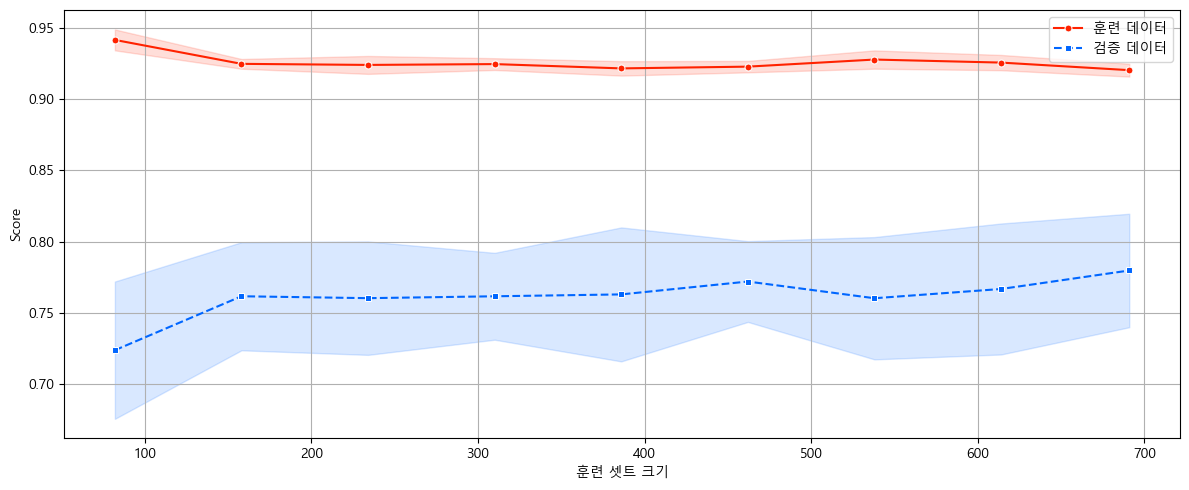

CPU times: total: 1.83 s
Wall time: 1.85 s


In [22]:
%%time

my_classification_result(rcv.best_estimator_, x_train, y_train, x_test, y_test)